# Deutsch's Algorithm to Tackle the Parity Problem


## Problem Statement  
Given a function  
$$
f: \{0, 1\}^n \rightarrow \{0, 1\}
$$  
determine whether \( f \) is **constant** (same output for all inputs) or **balanced** (outputs 0 for half of inputs and 1 for the other half) **using the fewest number of queries**.

Classically, this may require multiple queries. **Deutsch’s algorithm** uses **superposition and interference** to solve it with **a single query**.

---

In [115]:
from math import atan2
from qiskit import QuantumCircuit
import qiskit_aer as aer
import numpy as np
from qiskit.circuit.library import UnitaryGate

## Let's tackle creating a circuit to simulate Deutsch's algorithm

## Step 1 — Define the Oracle $U_f$

We choose  
$$
f(x) = \neg x = x \oplus 1
$$ 
which means:  
- $ f(0) = 1 $  
- $ f(1) = 0 $  

This corresponds to the following **unitary matrix**:

$$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

That is **exactly** the CNOT gate.

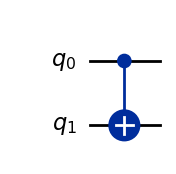

In [119]:

oracle = QuantumCircuit(2)
oracle.cx(0, 1)  # Control on input qubit, target output qubit
Uf = oracle.to_gate()
Uf.name = "$U_f$"

oracle.draw('mpl')

Step 2 — Build the Main Deutsch Circuit

The steps of the algorithm:

1. **Initialize qubits**  
   - Input qubit: $(\ket{0}) → H → \ket{+}$
   - Output qubit: $(\ket{0}) → X → H → \ket{-}$

2. **Apply the oracle $U_f$**.

3. **Apply Hadamard** to the input qubit again to create interference.

4. **Measure** the input qubit.

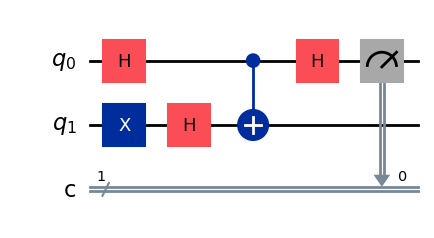

In [117]:
# Main Deutsch circuit
qc = QuantumCircuit(2, 1)

# Step 1: prepare input in |+>, output in |->
qc.h(0)
qc.x(1)
qc.h(1)

# Step 2: apply oracle
qc.compose(oracle, inplace=True)

# Step 3: Hadamard on input
qc.h(0)

# Step 4: measure input
qc.measure(0, 0)

qc.draw('mpl')

## Step 3 — Simulate the Circuit with Qiskit Aer

We use Qiskit Aer’s simulator to get the result distribution.

In [118]:
# Use the Aer simulator from qiskit_aer
simulator = aer.AerSimulator()

# Run the circuit on the simulator
job = simulator.run(qc, shots=1024)

# Get the results from the job
result = job.result()

# Get the measurement counts
counts = result.get_counts(qc)

# Print the final result
print("\nMeasurement results:", counts)


Measurement results: {'1': 1024}
